<a href="https://colab.research.google.com/github/dominiksakic/deeplearning00/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize data; dont use test mean, or std
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
from keras import layers
import keras

def build_model():
  model = keras.Sequential([
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=["mae"])
  return model

In [3]:
import numpy as np

# Train data is sparse; Using K-fold for validation will result in reliable validation scores
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
            validation_data=(val_data, val_targets),
            epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


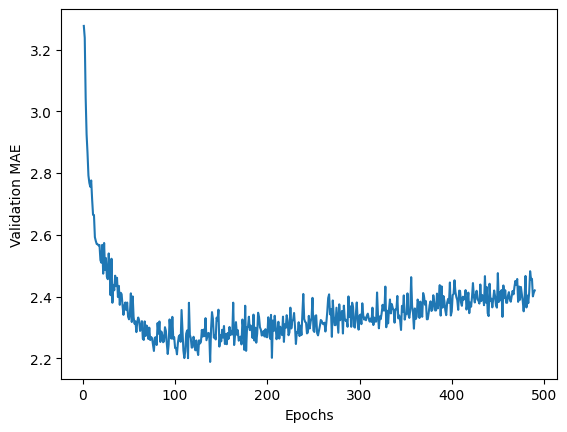

In [4]:
import matplotlib.pyplot as plt

truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [46]:
model = build_model()
model.fit(train_data, train_targets, epochs=130,
          batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.4277 - mae: 2.2287


In [47]:
test_mae_score

2.435917377471924

In [53]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([8.25034], dtype=float32)